In [37]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import seaborn as sns

In [2]:
print(os.getcwd())
dataFrame = pd.read_csv('loan.csv.csv')

c:\Users\Admin\Documents\ml project\june major project


In [3]:
print(dataFrame.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
dataFrame.describe()
dataFrame.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,5,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,220,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [6]:
headers = dataFrame.columns
dataFrame.dtypes
dataFrame.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
for header in headers:
    df = dataFrame[header]
    if(df.dtype == 'object'):
        mostRepetedValues = df.mode()[0]
        df.fillna(mostRepetedValues,inplace=True)
    else:
        mean = df.mean()
        df.fillna(mean,inplace=True)

In [8]:
dataFrame.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,5,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,220,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.000000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.037468,64.372489,0.349681,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,129.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


In [9]:
dataFrame.drop(headers[0],inplace=True,axis=1)

In [10]:
dataFrame.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,5,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,220,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.000000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.037468,64.372489,0.349681,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,129.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


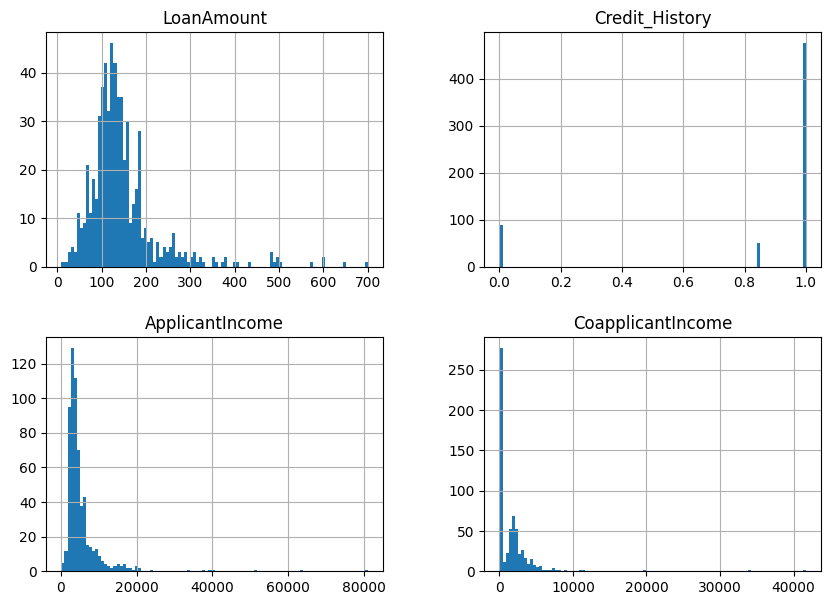

In [11]:
dataFrame[['LoanAmount','Credit_History','ApplicantIncome','CoapplicantIncome','Loan_Status']].hist(figsize=(10,7),bins=100)
plt.show()

In [12]:
dataFrame['Dependents']=dataFrame['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3})
dataFrame['Loan_Status'] = dataFrame['Loan_Status'].replace({'Y':1,'N':0})
dataFrame['Loan_Status']

C:\Users\Admin\AppData\Local\Temp\ipykernel_2224\862363868.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['Dependents']=dataFrame['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3})
C:\Users\Admin\AppData\Local\Temp\ipykernel_2224\862363868.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['Loan_Status'] = dataFrame['Loan_Status'].replace({'Y':1,'N':0})


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [13]:
dataFrame['ApplicantIncome'].corr(dataFrame['Loan_Status'])
headers = dataFrame.columns
for header in headers:
    if(dataFrame[header].dtype != 'object'):
        print(f'correlation between {header} and Loan_Status : ',dataFrame[header].corr(dataFrame['Loan_Status']))

correlation between Dependents and Loan_Status :  0.01011845449700453
correlation between ApplicantIncome and Loan_Status :  -0.0047095226593515385
correlation between CoapplicantIncome and Loan_Status :  -0.05918731348785017
correlation between LoanAmount and Loan_Status :  -0.03641600997237062
correlation between Loan_Amount_Term and Loan_Status :  -0.02097384400920143
correlation between Credit_History and Loan_Status :  0.5404832126453121
correlation between Loan_Status and Loan_Status :  1.0


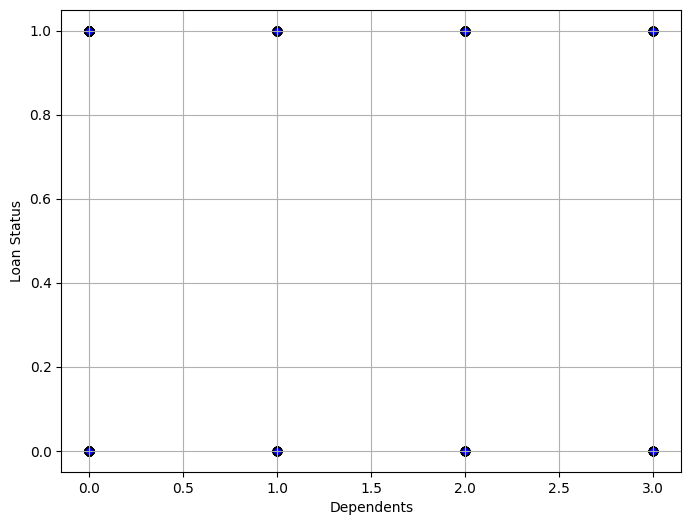

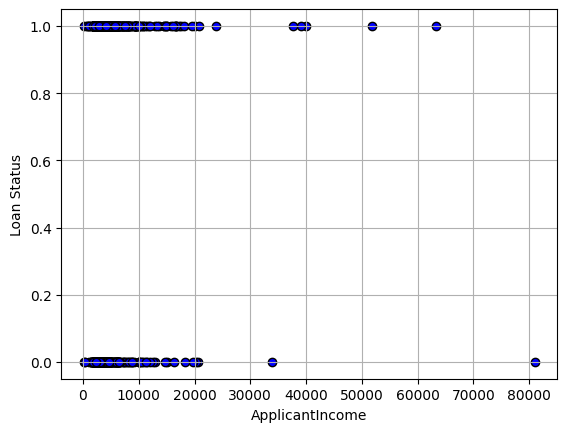

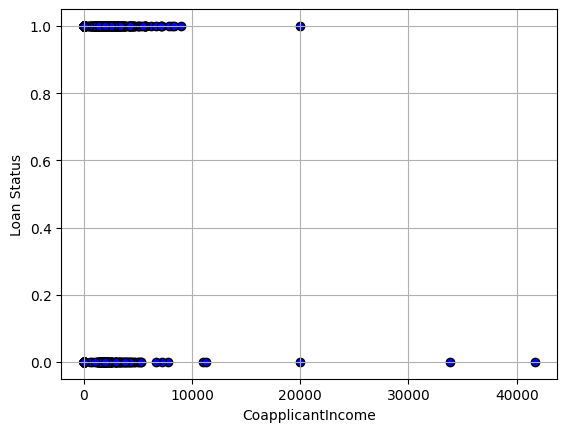

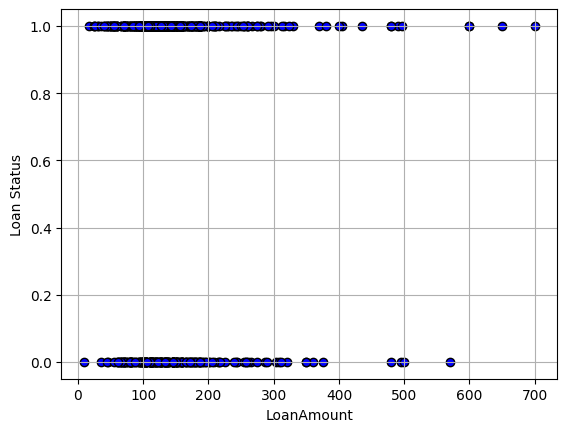

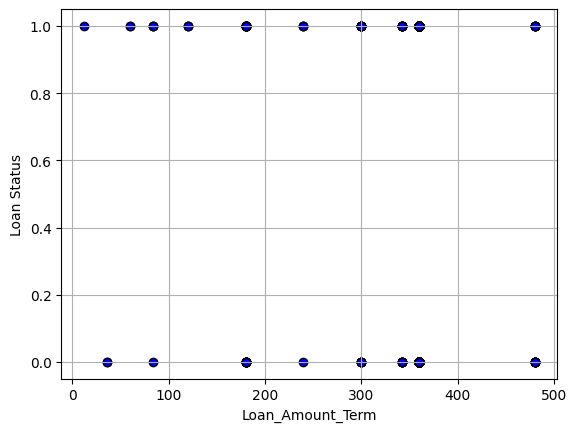

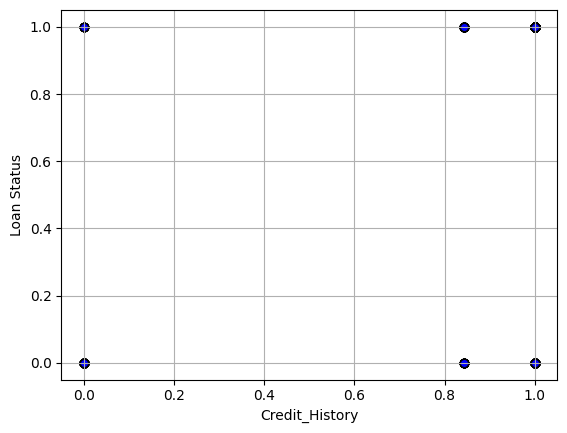

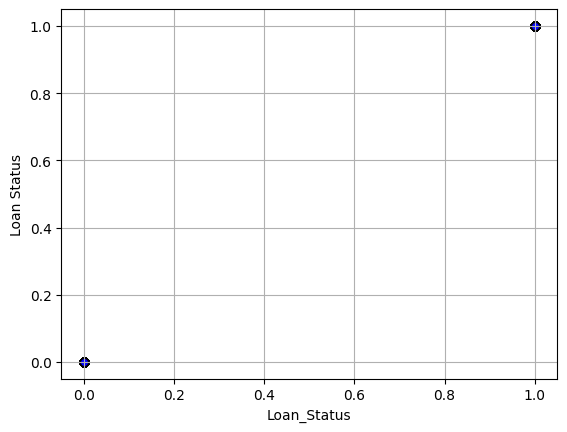

In [14]:
plt.figure(figsize=(8,6))
for header in headers:
    if(dataFrame[header].dtype != 'object'):
        plt.scatter(dataFrame[header],dataFrame['Loan_Status'],color='blue',edgecolors='k')
        plt.xlabel(header)
        plt.ylabel('Loan Status')
        plt.grid(True)
        plt.show()

In [15]:
target = dataFrame['Loan_Status']
dataFrame.drop('Loan_Status',inplace=True,axis=1)
dataFrame.columns
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [16]:
dataFrame.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614,614,614.000000,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614
unique,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,5
top,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban
freq,502,401,NaN,480,532,NaN,NaN,NaN,NaN,NaN,220
mean,NaN,NaN,0.744300,NaN,NaN,5403.459283,1621.245798,146.412162,342.000000,0.842199,NaN
std,NaN,NaN,1.009623,NaN,NaN,6109.041673,2926.248369,84.037468,64.372489,0.349681,NaN
min,NaN,NaN,0.000000,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,3812.500000,1188.500000,129.000000,360.000000,1.000000,NaN
75%,NaN,NaN,1.000000,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN


In [17]:
dataFrame['Property_Area'] = dataFrame['Property_Area'].replace({'Semi-urban':'Semiurban','semiurban':'Semiurban'})
print(dataFrame['Education'].unique(),dataFrame['Property_Area'].unique(),dataFrame['Gender'].unique(),dataFrame['Married'].unique(),dataFrame['Self_Employed'].unique())
dataFrame['Education'] = dataFrame['Education'].replace({'Graduate':1,'Not Graduate':0})
dataFrame['Property_Area'] = dataFrame['Property_Area'].replace({'Rural':0,'Urban':1,'Semiurban':2})
dataFrame['Gender'] = dataFrame['Gender'].replace({'Male':1,'Female':0})
dataFrame['Married'] = dataFrame['Married'].replace({'Yes':1,'No':0})
dataFrame['Self_Employed'] = dataFrame['Self_Employed'].replace({'Yes':1,'No':0})

['Graduate' 'Not Graduate'] ['Urban' 'Rural' 'Semiurban'] ['Male' 'Female'] ['No' 'Yes'] ['No' 'Yes']


C:\Users\Admin\AppData\Local\Temp\ipykernel_2224\3488992142.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['Education'] = dataFrame['Education'].replace({'Graduate':1,'Not Graduate':0})
C:\Users\Admin\AppData\Local\Temp\ipykernel_2224\3488992142.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['Property_Area'] = dataFrame['Property_Area'].replace({'Rural':0,'Urban':1,'Semiurban':2})
C:\Users\Admin\AppData\Local\Temp\ipykernel_2224\3488992142.py:5: FutureWarning: Downcasting behavior in `replace` is depr

In [18]:
dataFrame.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.087948
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.815081
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000


In [26]:
def get_model_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print(classification_report(y_test,y_pred))
    return accuracy_score(y_test,y_pred)

In [20]:
DataFrame = dataFrame
columnDrop = ['Gender','Married']
dataFrame.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.087948
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.815081
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000


Running : RandomForestClassifier


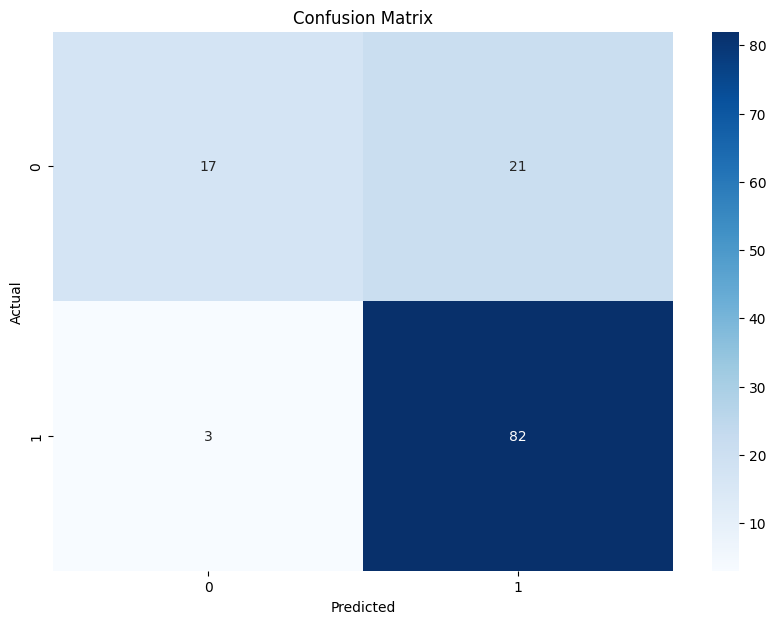

              precision    recall  f1-score   support

           0       0.85      0.45      0.59        38
           1       0.80      0.96      0.87        85

    accuracy                           0.80       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.81      0.80      0.78       123

got score :  RandomForestClassifier 0.8048780487804879


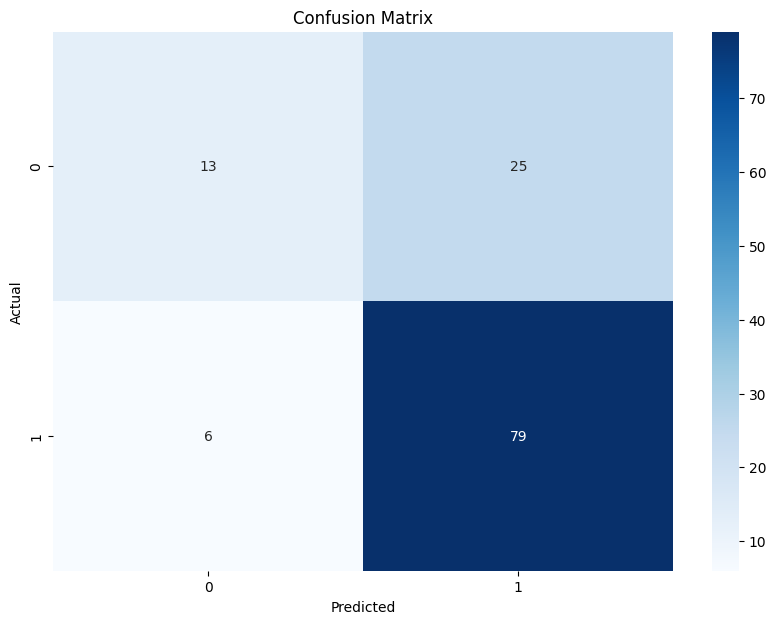

              precision    recall  f1-score   support

           0       0.68      0.34      0.46        38
           1       0.76      0.93      0.84        85

    accuracy                           0.75       123
   macro avg       0.72      0.64      0.65       123
weighted avg       0.74      0.75      0.72       123

got score :  RandomForestClassifier 0.7479674796747967


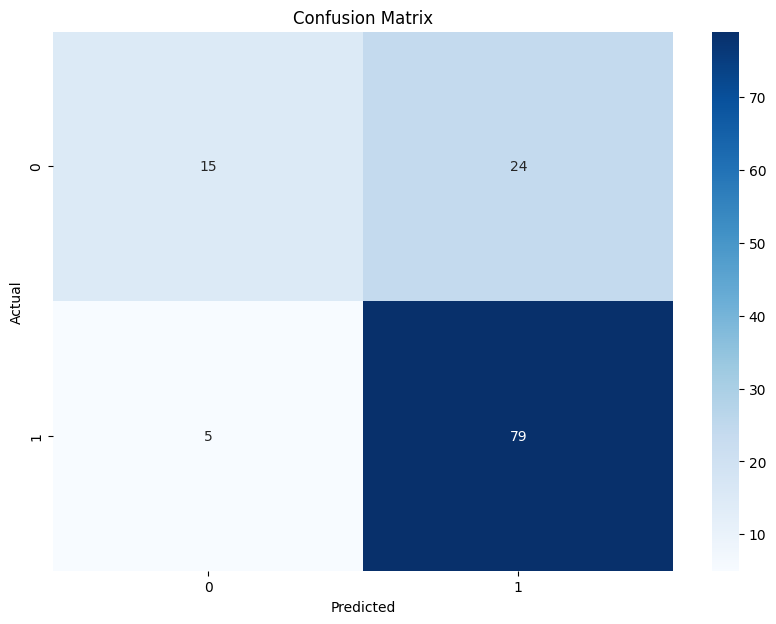

              precision    recall  f1-score   support

           0       0.75      0.38      0.51        39
           1       0.77      0.94      0.84        84

    accuracy                           0.76       123
   macro avg       0.76      0.66      0.68       123
weighted avg       0.76      0.76      0.74       123

got score :  RandomForestClassifier 0.7642276422764228


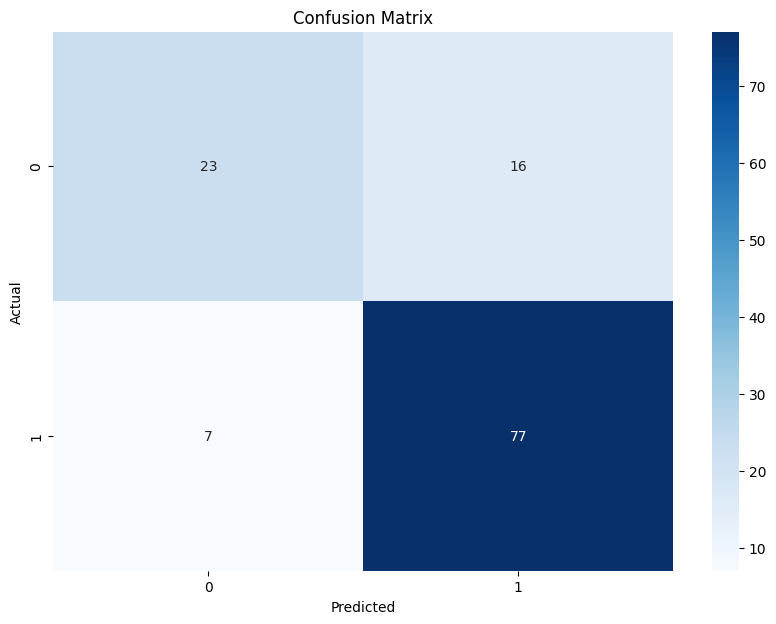

              precision    recall  f1-score   support

           0       0.77      0.59      0.67        39
           1       0.83      0.92      0.87        84

    accuracy                           0.81       123
   macro avg       0.80      0.75      0.77       123
weighted avg       0.81      0.81      0.81       123

got score :  RandomForestClassifier 0.8130081300813008


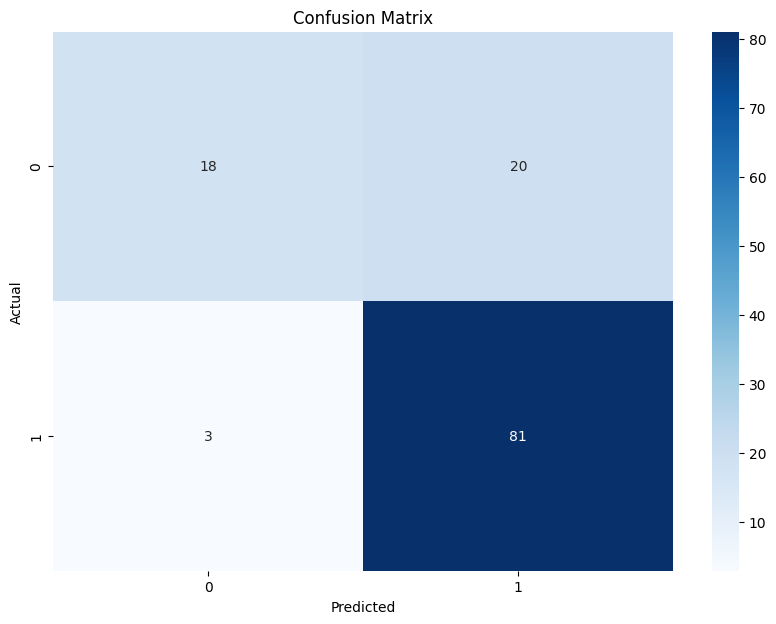

              precision    recall  f1-score   support

           0       0.86      0.47      0.61        38
           1       0.80      0.96      0.88        84

    accuracy                           0.81       122
   macro avg       0.83      0.72      0.74       122
weighted avg       0.82      0.81      0.79       122

got score :  RandomForestClassifier 0.8114754098360656
model :  RandomForestClassifier 0.7883113421298147
Running : DecisionTreeClassifier


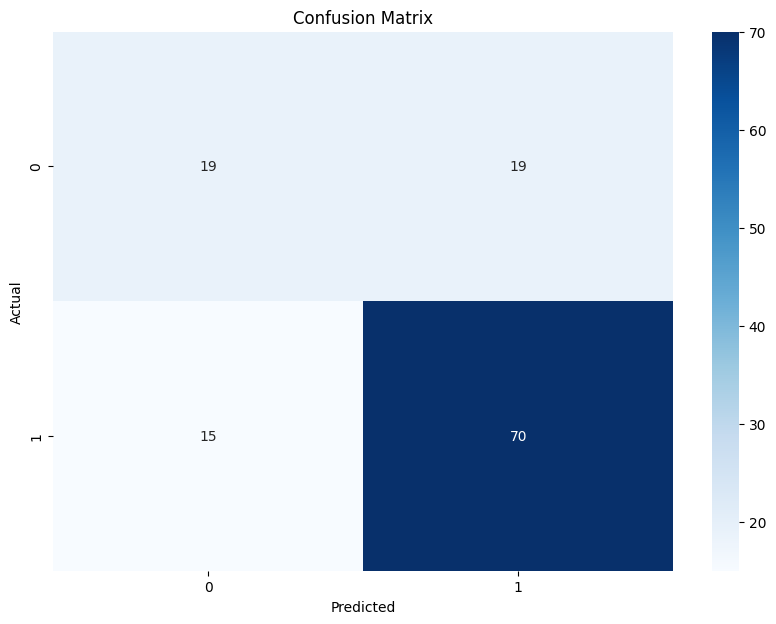

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        38
           1       0.79      0.82      0.80        85

    accuracy                           0.72       123
   macro avg       0.67      0.66      0.67       123
weighted avg       0.72      0.72      0.72       123

got score :  DecisionTreeClassifier 0.7235772357723578


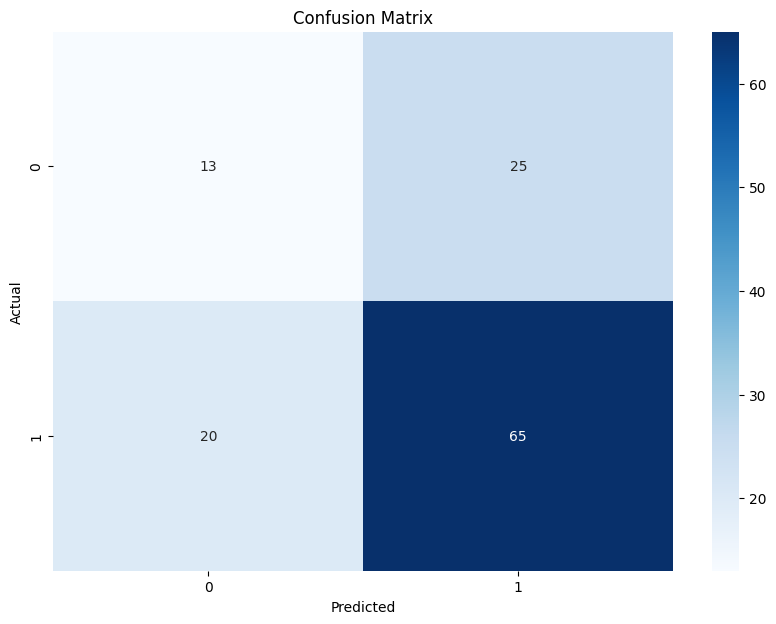

              precision    recall  f1-score   support

           0       0.39      0.34      0.37        38
           1       0.72      0.76      0.74        85

    accuracy                           0.63       123
   macro avg       0.56      0.55      0.55       123
weighted avg       0.62      0.63      0.63       123

got score :  DecisionTreeClassifier 0.6341463414634146


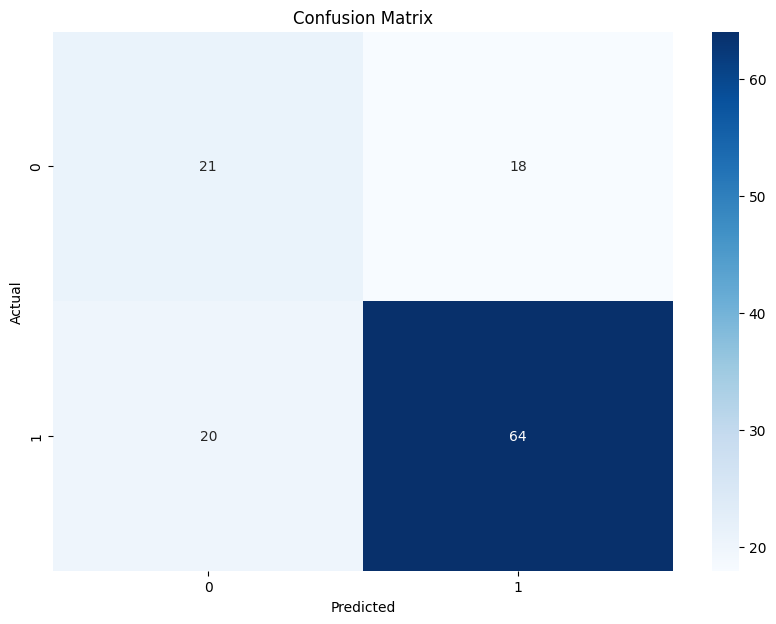

              precision    recall  f1-score   support

           0       0.51      0.54      0.53        39
           1       0.78      0.76      0.77        84

    accuracy                           0.69       123
   macro avg       0.65      0.65      0.65       123
weighted avg       0.70      0.69      0.69       123

got score :  DecisionTreeClassifier 0.6910569105691057


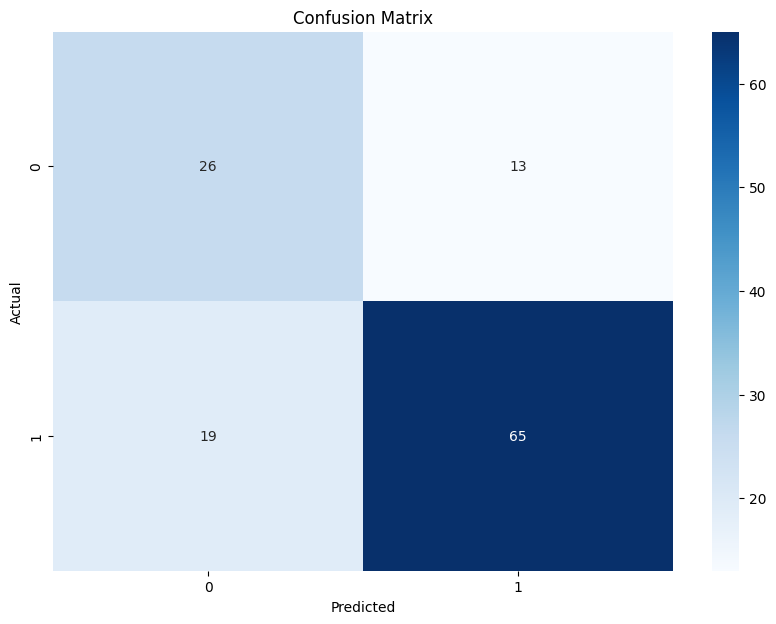

              precision    recall  f1-score   support

           0       0.58      0.67      0.62        39
           1       0.83      0.77      0.80        84

    accuracy                           0.74       123
   macro avg       0.71      0.72      0.71       123
weighted avg       0.75      0.74      0.74       123

got score :  DecisionTreeClassifier 0.7398373983739838


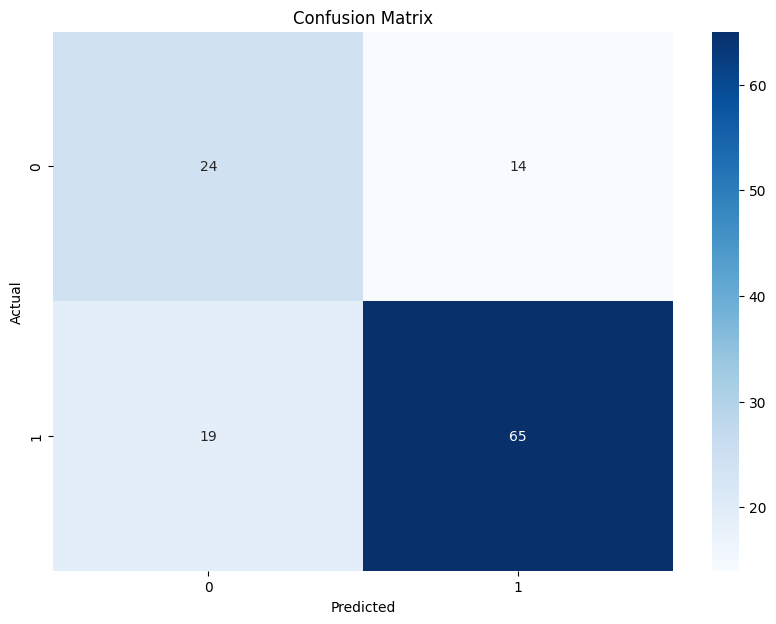

              precision    recall  f1-score   support

           0       0.56      0.63      0.59        38
           1       0.82      0.77      0.80        84

    accuracy                           0.73       122
   macro avg       0.69      0.70      0.70       122
weighted avg       0.74      0.73      0.73       122

got score :  DecisionTreeClassifier 0.7295081967213115
model :  DecisionTreeClassifier 0.7036252165800347
Running : KNeighborsClassifier


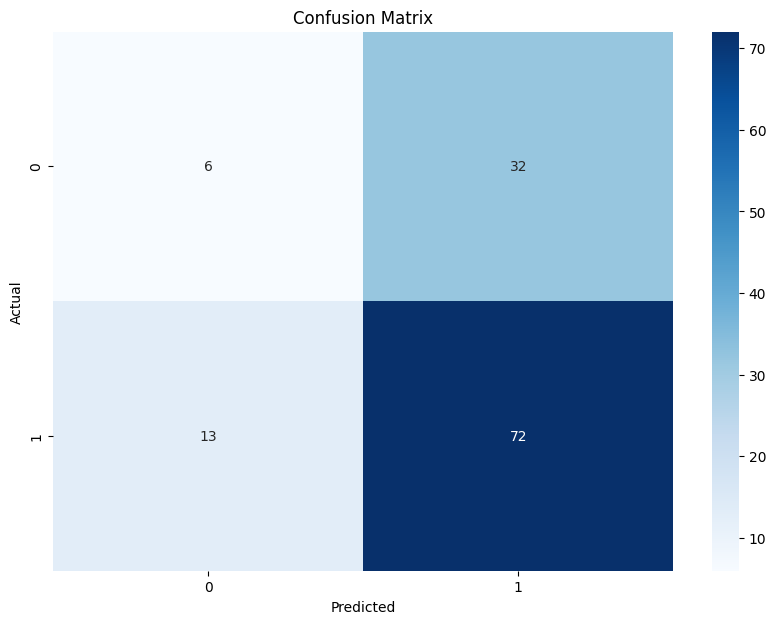

              precision    recall  f1-score   support

           0       0.32      0.16      0.21        38
           1       0.69      0.85      0.76        85

    accuracy                           0.63       123
   macro avg       0.50      0.50      0.49       123
weighted avg       0.58      0.63      0.59       123

got score :  KNeighborsClassifier 0.6341463414634146


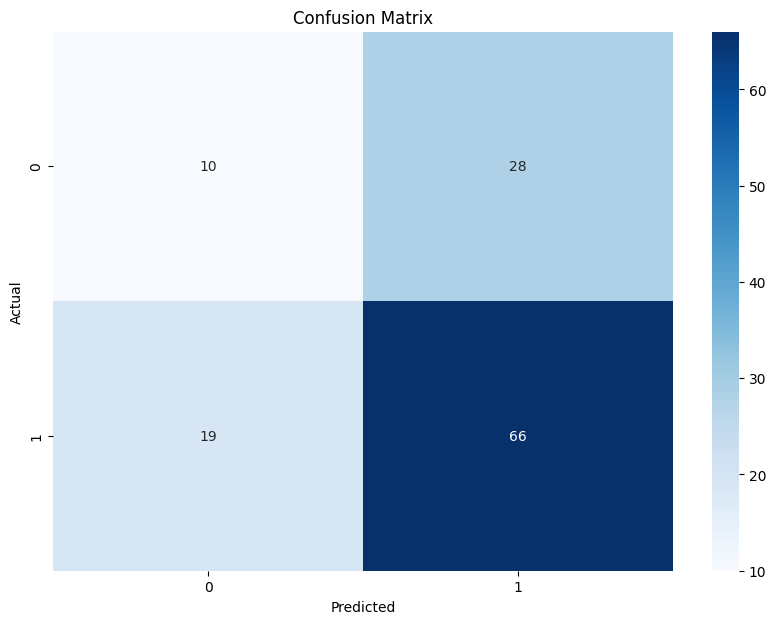

              precision    recall  f1-score   support

           0       0.34      0.26      0.30        38
           1       0.70      0.78      0.74        85

    accuracy                           0.62       123
   macro avg       0.52      0.52      0.52       123
weighted avg       0.59      0.62      0.60       123

got score :  KNeighborsClassifier 0.6178861788617886


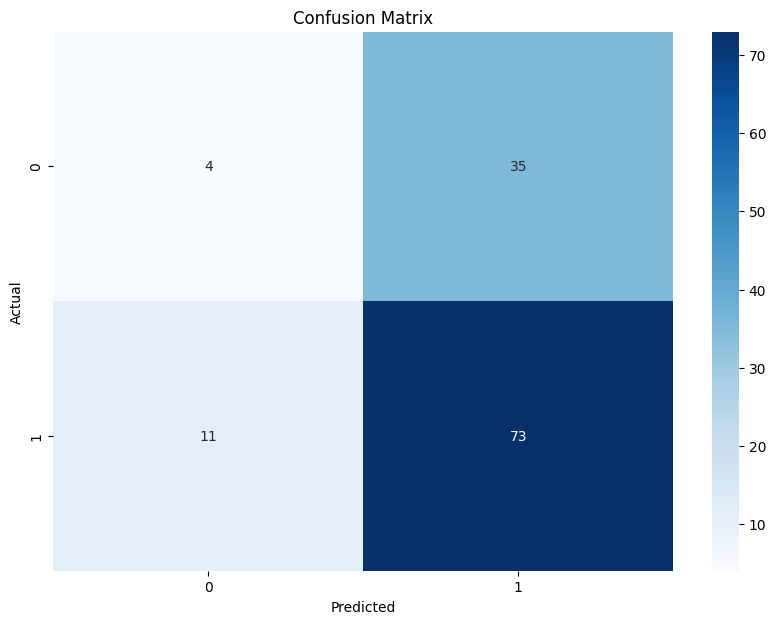

              precision    recall  f1-score   support

           0       0.27      0.10      0.15        39
           1       0.68      0.87      0.76        84

    accuracy                           0.63       123
   macro avg       0.47      0.49      0.45       123
weighted avg       0.55      0.63      0.57       123

got score :  KNeighborsClassifier 0.6260162601626016


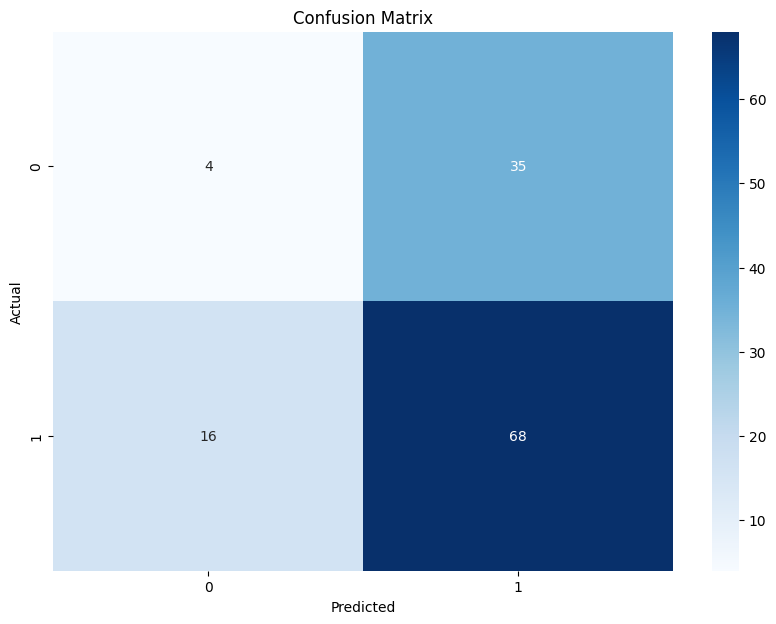

              precision    recall  f1-score   support

           0       0.20      0.10      0.14        39
           1       0.66      0.81      0.73        84

    accuracy                           0.59       123
   macro avg       0.43      0.46      0.43       123
weighted avg       0.51      0.59      0.54       123

got score :  KNeighborsClassifier 0.5853658536585366


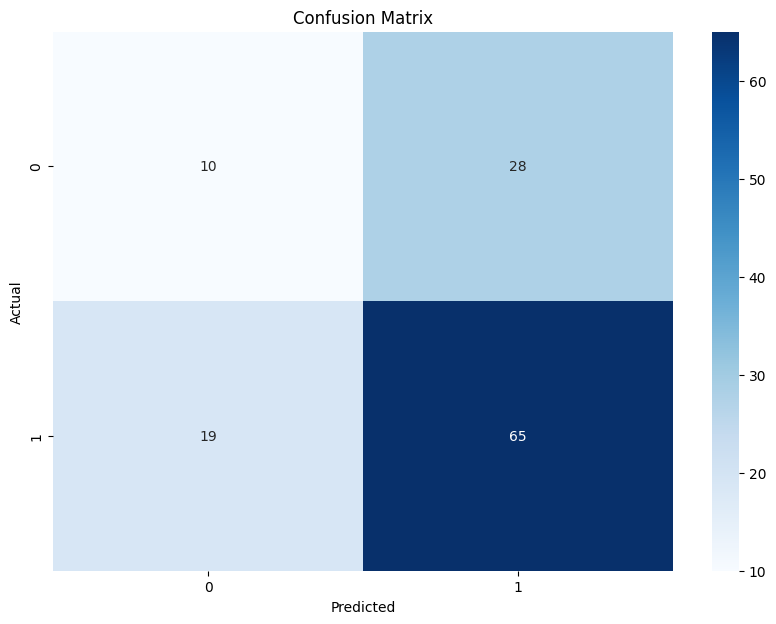

              precision    recall  f1-score   support

           0       0.34      0.26      0.30        38
           1       0.70      0.77      0.73        84

    accuracy                           0.61       122
   macro avg       0.52      0.52      0.52       122
weighted avg       0.59      0.61      0.60       122

got score :  KNeighborsClassifier 0.6147540983606558
model :  KNeighborsClassifier 0.6156337465013995
Running : LogisticRegression


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


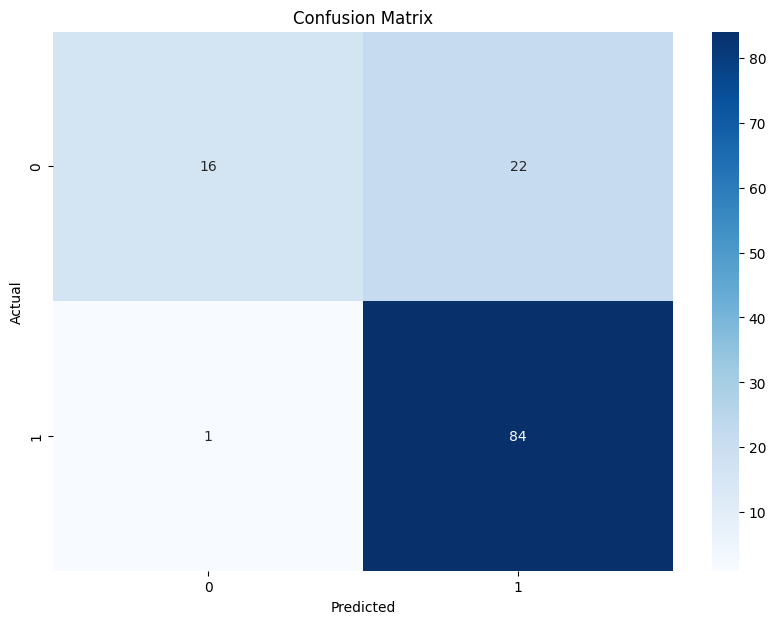

              precision    recall  f1-score   support

           0       0.94      0.42      0.58        38
           1       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123

got score :  LogisticRegression 0.8130081300813008


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


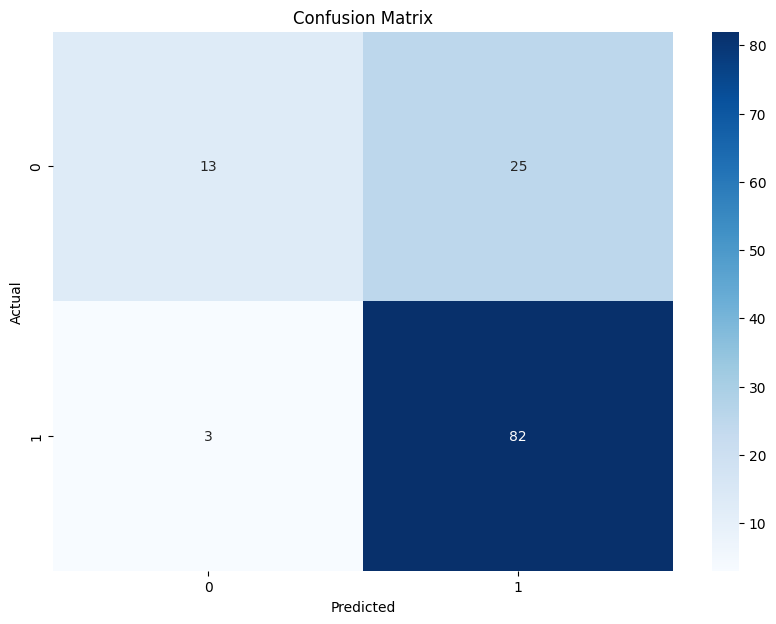

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.81      0.34      0.48        38
           1       0.77      0.96      0.85        85

    accuracy                           0.77       123
   macro avg       0.79      0.65      0.67       123
weighted avg       0.78      0.77      0.74       123

got score :  LogisticRegression 0.7723577235772358


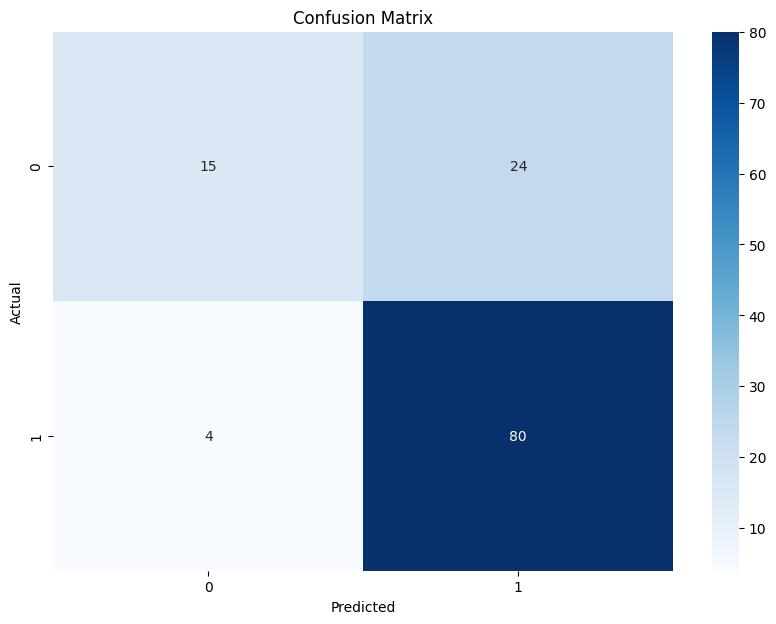

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.79      0.38      0.52        39
           1       0.77      0.95      0.85        84

    accuracy                           0.77       123
   macro avg       0.78      0.67      0.68       123
weighted avg       0.78      0.77      0.75       123

got score :  LogisticRegression 0.7723577235772358


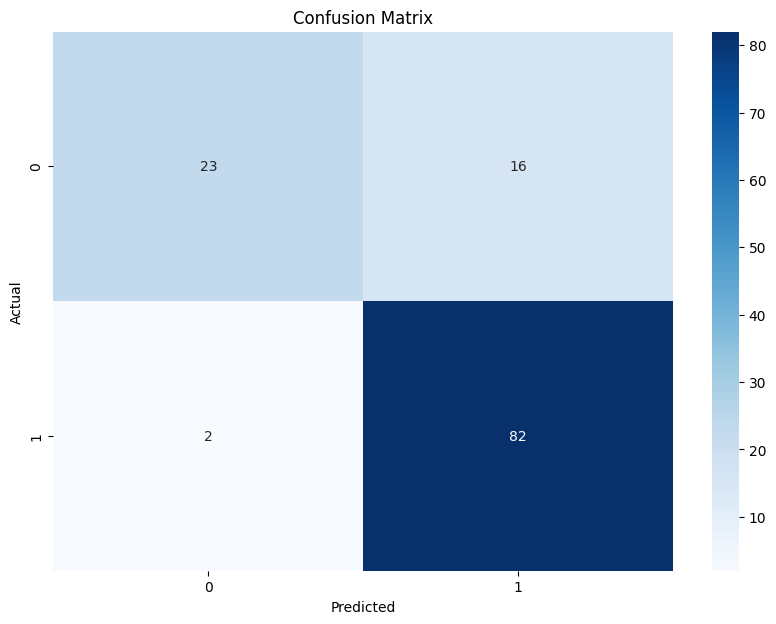

              precision    recall  f1-score   support

           0       0.92      0.59      0.72        39
           1       0.84      0.98      0.90        84

    accuracy                           0.85       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123

got score :  LogisticRegression 0.8536585365853658


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


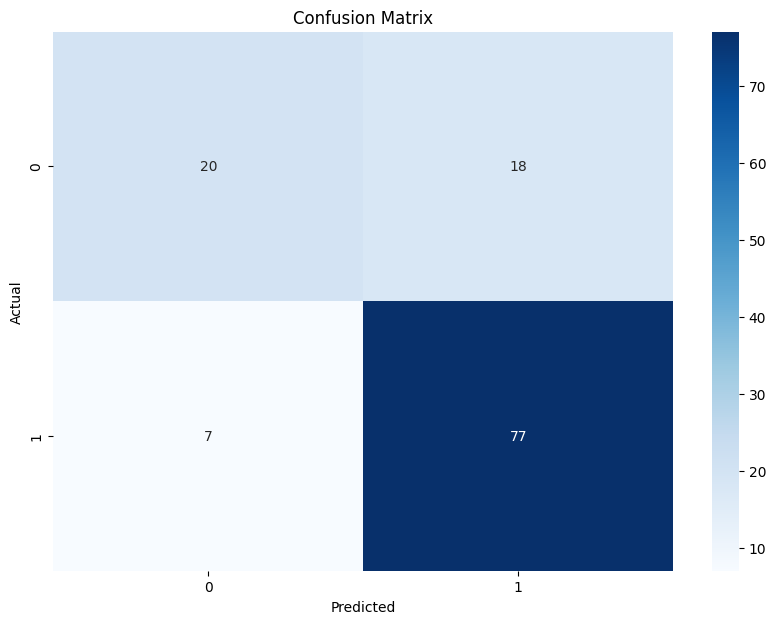

              precision    recall  f1-score   support

           0       0.74      0.53      0.62        38
           1       0.81      0.92      0.86        84

    accuracy                           0.80       122
   macro avg       0.78      0.72      0.74       122
weighted avg       0.79      0.80      0.78       122

got score :  LogisticRegression 0.7950819672131147
model :  LogisticRegression 0.8012928162068504
Running : GaussianNB


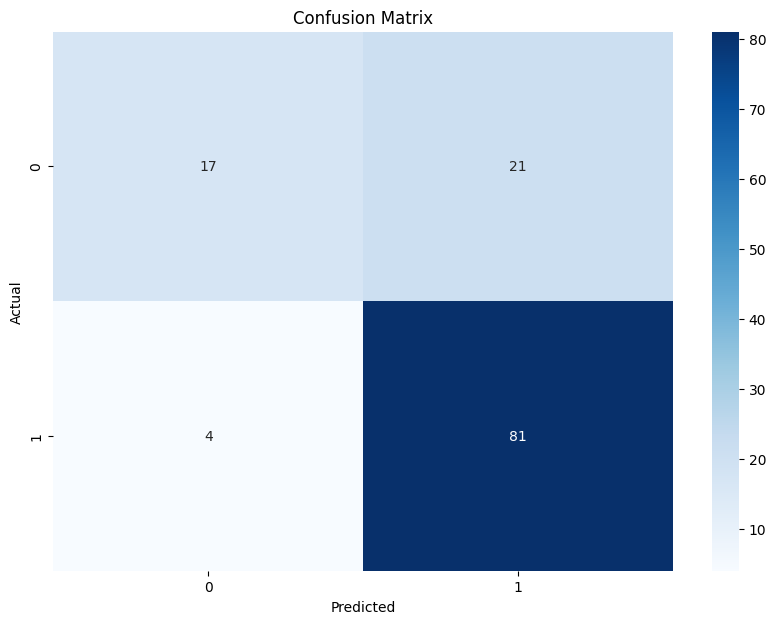

              precision    recall  f1-score   support

           0       0.81      0.45      0.58        38
           1       0.79      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.80      0.70      0.72       123
weighted avg       0.80      0.80      0.78       123

got score :  GaussianNB 0.7967479674796748


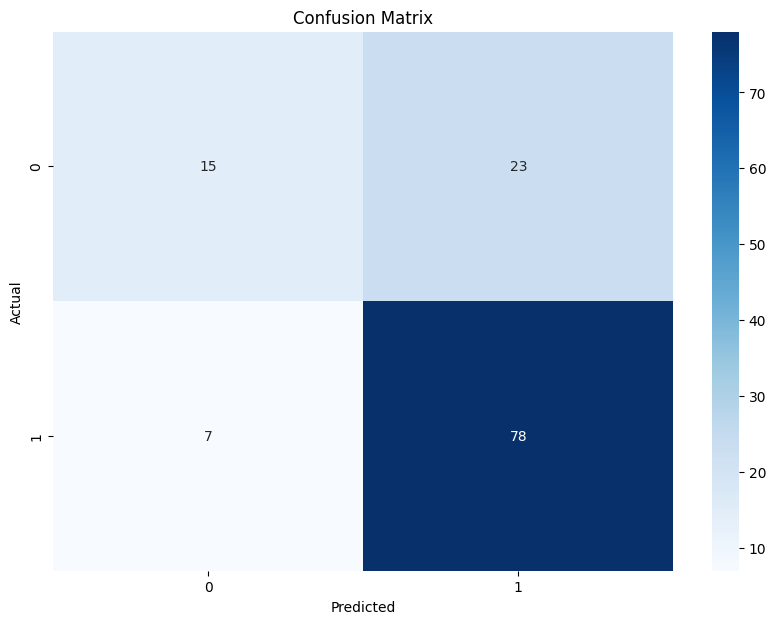

              precision    recall  f1-score   support

           0       0.68      0.39      0.50        38
           1       0.77      0.92      0.84        85

    accuracy                           0.76       123
   macro avg       0.73      0.66      0.67       123
weighted avg       0.74      0.76      0.73       123

got score :  GaussianNB 0.7560975609756098


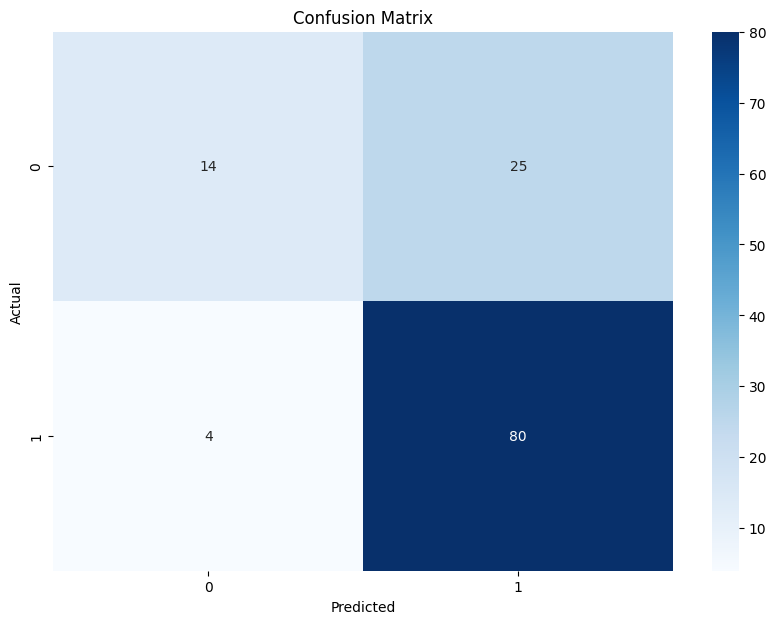

              precision    recall  f1-score   support

           0       0.78      0.36      0.49        39
           1       0.76      0.95      0.85        84

    accuracy                           0.76       123
   macro avg       0.77      0.66      0.67       123
weighted avg       0.77      0.76      0.73       123

got score :  GaussianNB 0.7642276422764228


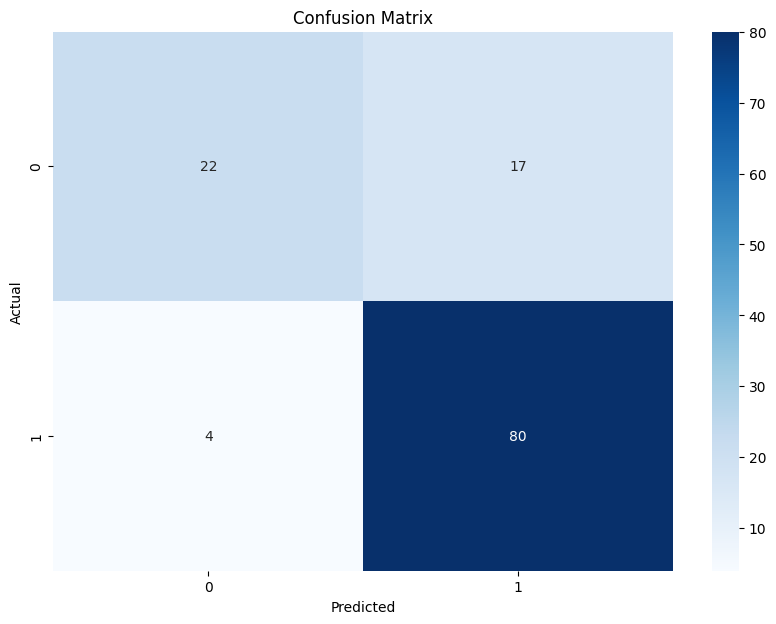

              precision    recall  f1-score   support

           0       0.85      0.56      0.68        39
           1       0.82      0.95      0.88        84

    accuracy                           0.83       123
   macro avg       0.84      0.76      0.78       123
weighted avg       0.83      0.83      0.82       123

got score :  GaussianNB 0.8292682926829268


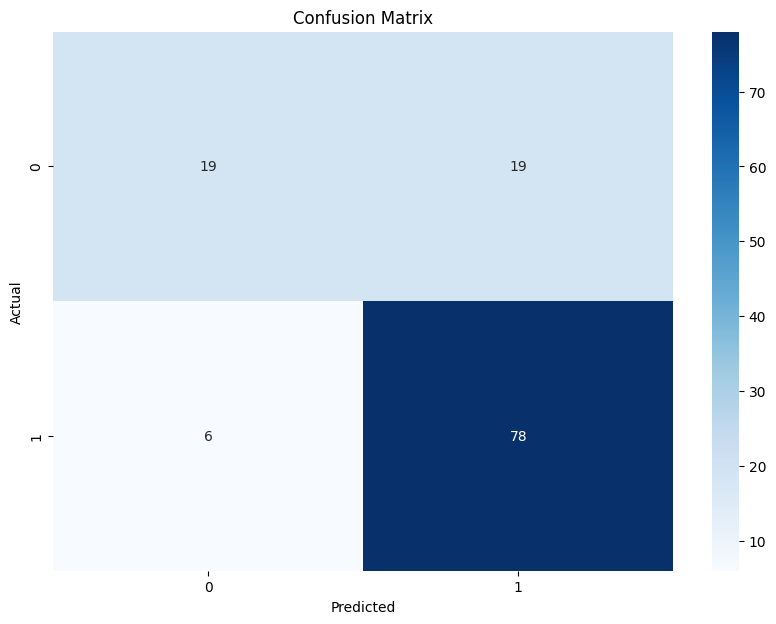

              precision    recall  f1-score   support

           0       0.76      0.50      0.60        38
           1       0.80      0.93      0.86        84

    accuracy                           0.80       122
   macro avg       0.78      0.71      0.73       122
weighted avg       0.79      0.80      0.78       122

got score :  GaussianNB 0.7950819672131147
model :  GaussianNB 0.7882846861255498
Running : GradientBoostingClassifier


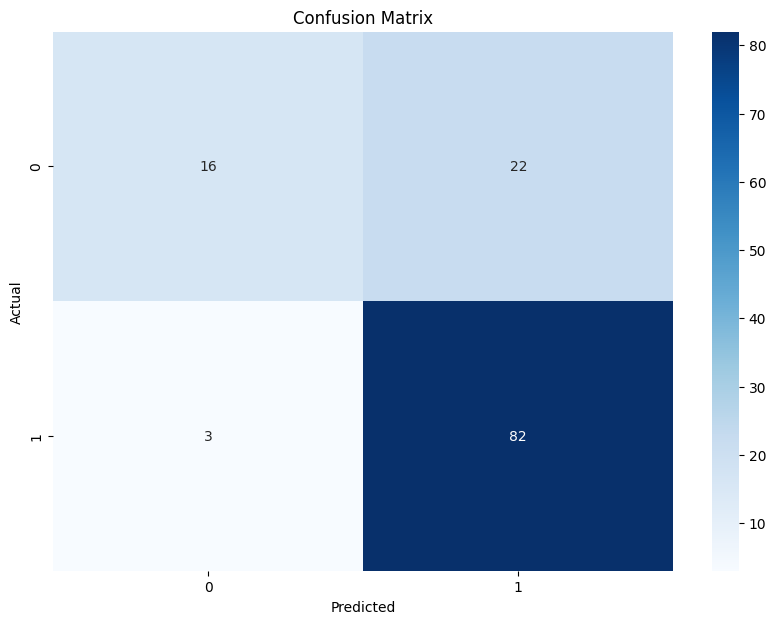

              precision    recall  f1-score   support

           0       0.84      0.42      0.56        38
           1       0.79      0.96      0.87        85

    accuracy                           0.80       123
   macro avg       0.82      0.69      0.71       123
weighted avg       0.81      0.80      0.77       123

got score :  GradientBoostingClassifier 0.7967479674796748


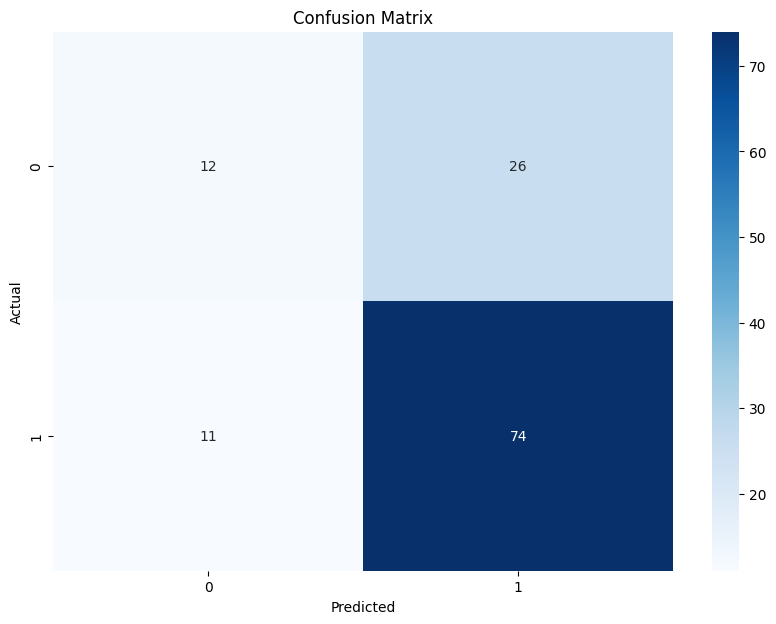

              precision    recall  f1-score   support

           0       0.52      0.32      0.39        38
           1       0.74      0.87      0.80        85

    accuracy                           0.70       123
   macro avg       0.63      0.59      0.60       123
weighted avg       0.67      0.70      0.67       123

got score :  GradientBoostingClassifier 0.6991869918699187


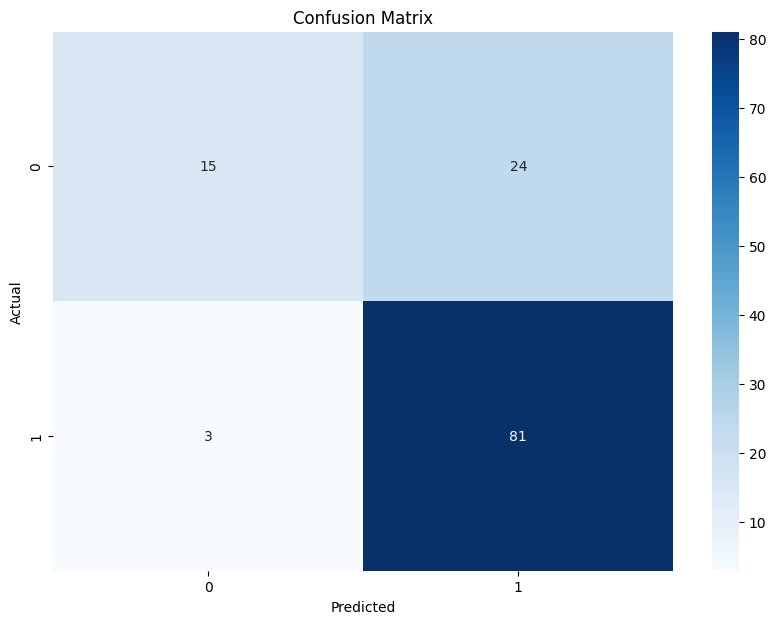

              precision    recall  f1-score   support

           0       0.83      0.38      0.53        39
           1       0.77      0.96      0.86        84

    accuracy                           0.78       123
   macro avg       0.80      0.67      0.69       123
weighted avg       0.79      0.78      0.75       123

got score :  GradientBoostingClassifier 0.7804878048780488


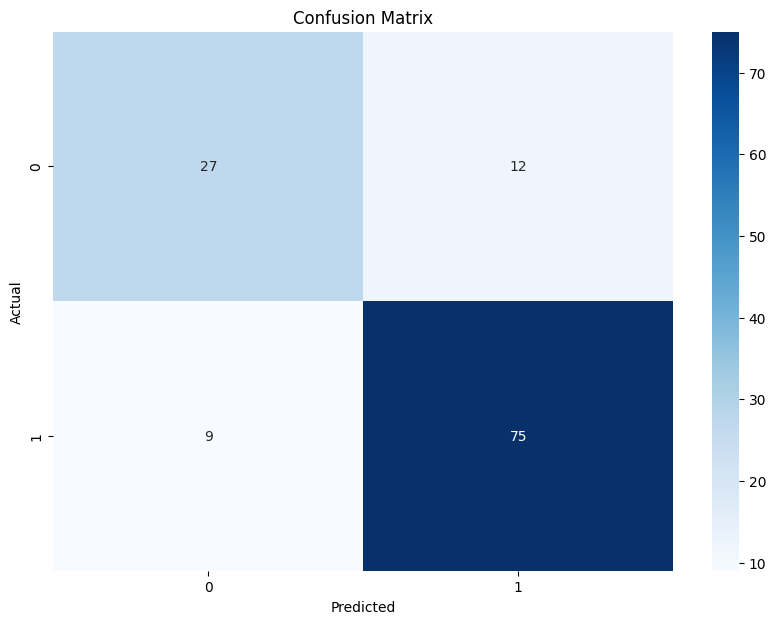

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        39
           1       0.86      0.89      0.88        84

    accuracy                           0.83       123
   macro avg       0.81      0.79      0.80       123
weighted avg       0.83      0.83      0.83       123

got score :  GradientBoostingClassifier 0.8292682926829268


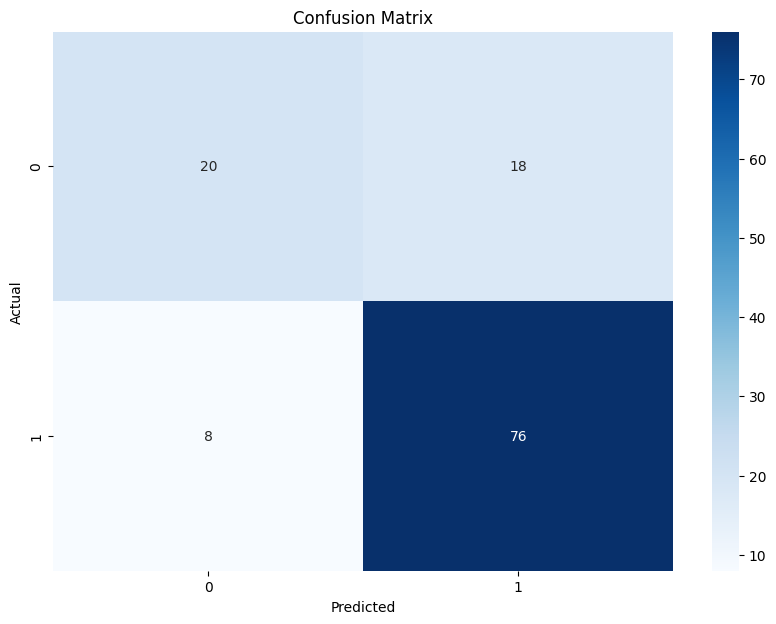

              precision    recall  f1-score   support

           0       0.71      0.53      0.61        38
           1       0.81      0.90      0.85        84

    accuracy                           0.79       122
   macro avg       0.76      0.72      0.73       122
weighted avg       0.78      0.79      0.78       122

got score :  GradientBoostingClassifier 0.7868852459016393
model :  GradientBoostingClassifier 0.7785152605624417
Running : MLPClassifier


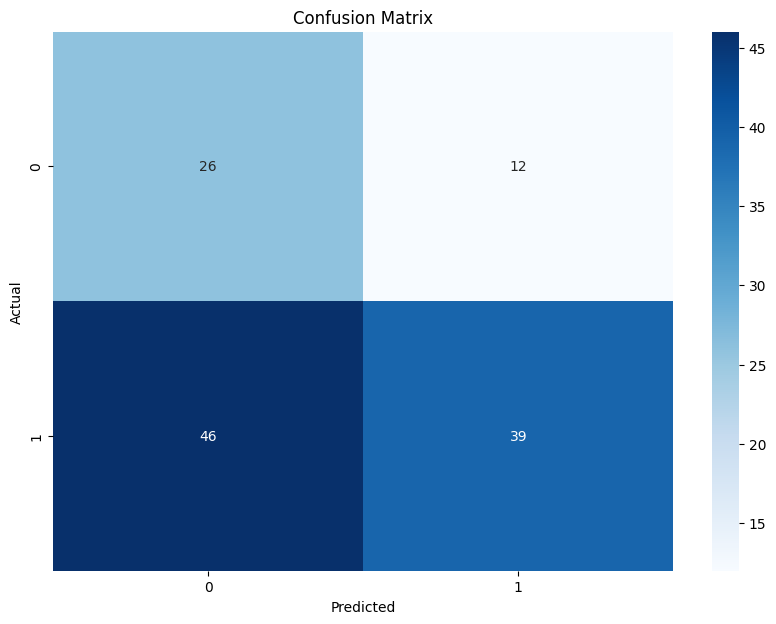

              precision    recall  f1-score   support

           0       0.36      0.68      0.47        38
           1       0.76      0.46      0.57        85

    accuracy                           0.53       123
   macro avg       0.56      0.57      0.52       123
weighted avg       0.64      0.53      0.54       123

got score :  MLPClassifier 0.5284552845528455


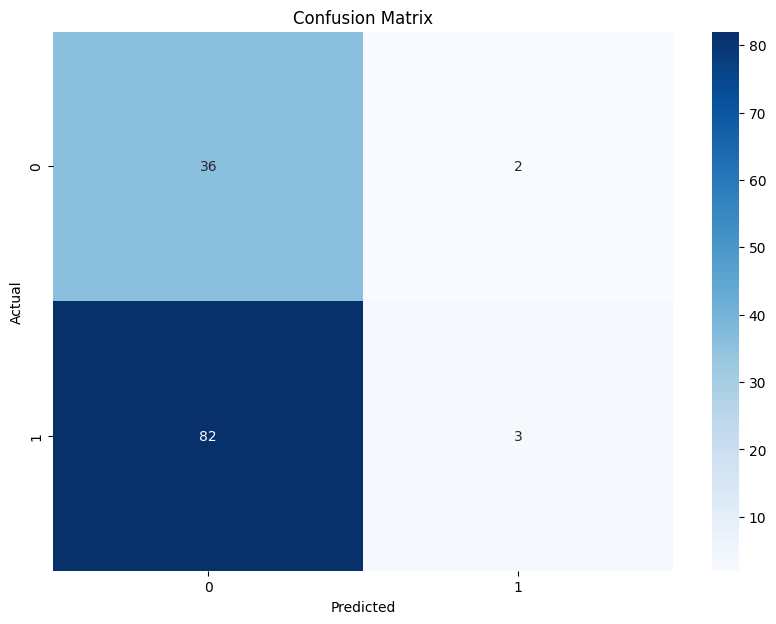

              precision    recall  f1-score   support

           0       0.31      0.95      0.46        38
           1       0.60      0.04      0.07        85

    accuracy                           0.32       123
   macro avg       0.45      0.49      0.26       123
weighted avg       0.51      0.32      0.19       123

got score :  MLPClassifier 0.3170731707317073


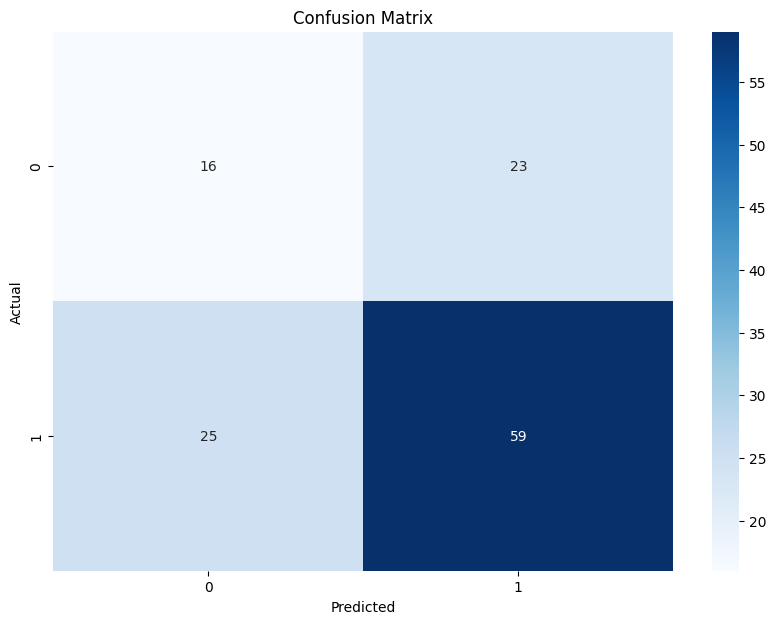

              precision    recall  f1-score   support

           0       0.39      0.41      0.40        39
           1       0.72      0.70      0.71        84

    accuracy                           0.61       123
   macro avg       0.55      0.56      0.56       123
weighted avg       0.62      0.61      0.61       123

got score :  MLPClassifier 0.6097560975609756


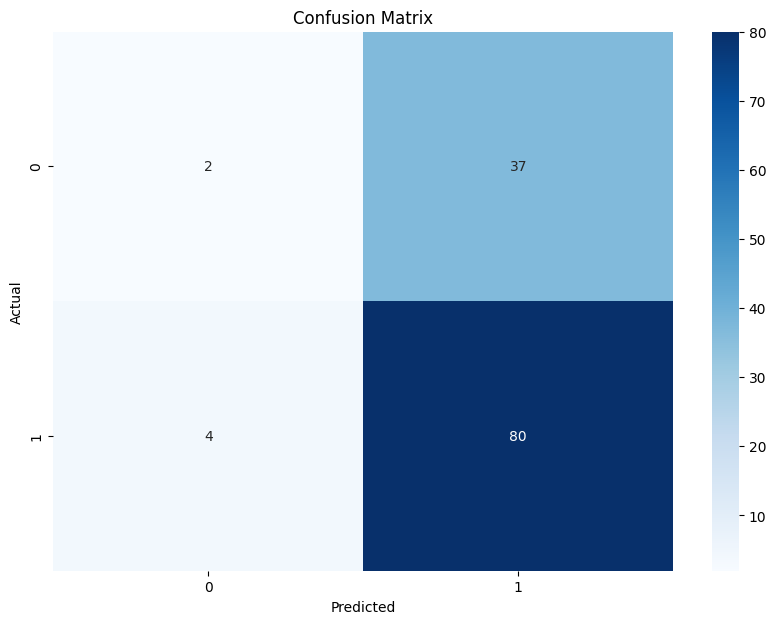

              precision    recall  f1-score   support

           0       0.33      0.05      0.09        39
           1       0.68      0.95      0.80        84

    accuracy                           0.67       123
   macro avg       0.51      0.50      0.44       123
weighted avg       0.57      0.67      0.57       123

got score :  MLPClassifier 0.6666666666666666


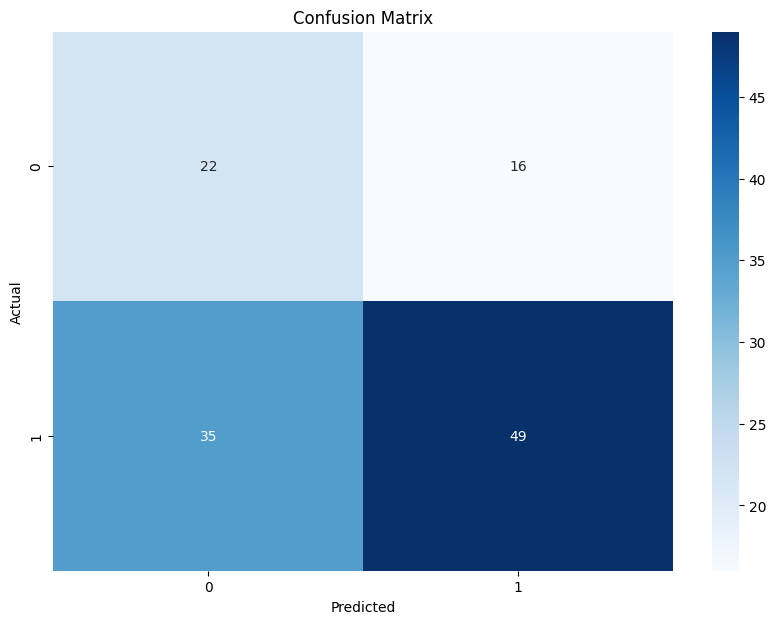

              precision    recall  f1-score   support

           0       0.39      0.58      0.46        38
           1       0.75      0.58      0.66        84

    accuracy                           0.58       122
   macro avg       0.57      0.58      0.56       122
weighted avg       0.64      0.58      0.60       122

got score :  MLPClassifier 0.5819672131147541
model :  MLPClassifier 0.5407836865253899


In [27]:
kfold = StratifiedKFold(n_splits=5)
score = []
models = [RandomForestClassifier(n_estimators=130),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=5),LogisticRegression(),GaussianNB(),GradientBoostingClassifier(),MLPClassifier(hidden_layer_sizes=(100,),max_iter=200)]
for model in models:
    print('Running :',model.__class__.__name__)
    for train_index,test_index in kfold.split(dataFrame,target):
        x_train,x_test,y_train,y_test = dataFrame.iloc[train_index],dataFrame.iloc[test_index],target.iloc[train_index],target.iloc[test_index]
        s =get_model_score(model,x_train,x_test,y_train,y_test)
        score.append(s)
        print('got score : ',model.__class__.__name__,s)
    avg_score = sum(score)/len(score)
    print('model : ',model.__class__.__name__,avg_score)
    score =[]

## From the above models it can be noted that the logistic regression model works well....  and has the consistent score of 80% 

Cross-validation scores: [0.80808081 0.81632653 0.81632653 0.78571429 0.78571429]
Mean CV score: 0.8024324881467738
Standard deviation CV score: 0.013978475848883813
Final model accuracy on test data: 0.8536585365853658
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.58      0.71        38
           1       0.84      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123



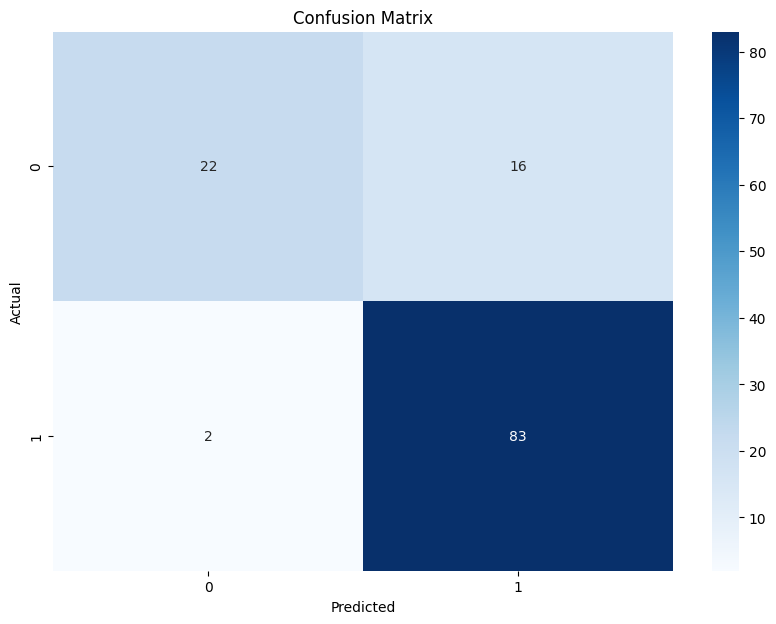

In [40]:
X_train, X_test, y_train, y_test = train_test_split(dataFrame, target, test_size=0.2, stratify=target, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=2000)


stratified_kfold = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=stratified_kfold)


print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation CV score:", np.std(cv_scores))


model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print("Final model accuracy on test data:", accuracy)
print("Classification report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Model Evaluation and Conclusions

### Cross-Validation Performance
- Cross-validation scores: `[0.80808081, 0.81632653, 0.81632653, 0.78571429, 0.78571429]`
- Mean CV score: `0.8024`
- Standard deviation CV score: `0.014`
- The model's accuracy is consistent across different folds, with a mean accuracy of approximately 80.24%.

### Final Model Accuracy on Test Data
- Final model accuracy on test data: `0.8537`
- The model correctly predicts 85.37% of the test samples, which is higher than the average cross-validation score.

### Classification Report
- **Class 0**:
  - Precision: `0.92`
  - Recall: `0.58`
  - F1-Score: `0.71`
  - Support: `38`
- **Class 1**:
  - Precision: `0.84`
  - Recall: `0.98`
  - F1-Score: `0.90`
  - Support: `85`
- **Overall Accuracy**: `0.85`
- **Macro Average**:
  - Precision: `0.88`
  - Recall: `0.78`
  - F1-Score: `0.81`
- **Weighted Average**:
  - Precision: `0.86`
  - Recall: `0.85`
  - F1-Score: `0.84`

### Interpretation
- The model performs well overall but shows lower recall for class 0, indicating many false negatives.
- The precision for class 0 is high, suggesting that when it predicts class 0, it is usually correct.

### Recommendations
- Address class imbalance by using oversampling, undersampling, or SMOTE.
- Adjust class weights in the logistic regression model.
- Explore different models and hyperparameters.
- Perform feature engineering to improve model performance.

### Next Steps
- Implement techniques to address class imbalance.
- Perform grid search for hyperparameter tuning.
- Explore additional models and compare their performance.
